This version: April 3, 2018

In [1]:
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter('ignore')
warnings.simplefilter('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning)

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [5]:
pd.options.display.float_format = '{:20,.4f}'.format

## Summary statistics from the input data set 


In [6]:
dflong = pd.read_csv("SP500_Long_V4.CSV")
dflong = dflong[['Ticker','Date','R','YR','AV','DRSD','RC','AVC','SDC','RT','AVT','SDT']]
dflong.describe()
display(dflong)
# Can add spy returns from indices long here

,Ticker,Date,R,YR,AV,DRSD,RC,AVC,SDC,RT,AVT,SDT
0,A,2003-11-26,0.1630,-0.0026,76.6760,0.0178,1.5208,-0.0965,0.1530,0.6691,2.3063,-0.7257
1,A,2003-12-26,-0.0026,0.2916,61.1830,0.0166,-0.5247,-0.1632,0.2908,-0.2834,1.0123,-0.7110
2,A,2004-01-27,0.2916,-0.0597,138.7625,0.0226,2.8893,0.1924,0.7865,1.8161,2.7908,0.1245
3,A,2004-02-25,-0.0597,-0.1377,129.9435,0.0214,-0.8789,0.1337,0.6231,-1.2857,1.8632,-0.0431
4,A,2004-03-24,-0.1377,0.0035,107.8090,0.0276,-1.9335,0.0190,1.2698,-1.5687,1.0583,1.5750
5,A,2004-04-22,0.0035,-0.1727,77.3330,0.0212,-0.6473,-0.1382,0.5909,-0.4129,0.1269,-0.1445
6,A,2004-05-20,-0.1727,0.0525,92.1400,0.0155,-1.7944,-0.0632,-0.1287,-1.4241,0.4515,-1.4355
7,A,2004-06-21,0.0525,0.0080,75.9650,0.0163,-0.0080,-0.0846,0.2718,0.2201,-0.1137,-1.1161
8,A,2004-07-20,0.0080,-0.1779,78.5570,0.0253,0.1982,-0.1060,1.3935,-0.1325,-0.1197,1.1191
9,A,2004-08-17,-0.1779,0.0560,77.4715,0.0353,-2.3988,-0.0998,1.4614,-1.2528,-0.2373,2.3009


In [7]:
# Add the SPY data from indices
indices = pd.read_csv("Indices_Long_V4.CSV")
indices = indices[indices['Ticker'] == 'SPY'][['Date','R','YR','RT']]
indices.rename(columns = {'R':'SPY_R', 'YR': 'SPY_YR', 'RT': 'SPY_RT'}, inplace = True)
display(indices)

,Date,SPY_R,SPY_YR,SPY_RT
0,2003-11-26,0.0113,0.0362,-0.1121
1,2003-12-26,0.0362,0.0454,0.3664
2,2004-01-27,0.0454,0.0017,0.4586
3,2004-02-25,0.0017,-0.0430,-0.7837
4,2004-03-24,-0.0430,0.0429,-1.6283
5,2004-04-22,0.0429,-0.0405,0.6623
6,2004-05-20,-0.0405,0.0364,-1.3232
7,2004-06-21,0.0364,-0.0138,0.6364
8,2004-07-20,-0.0138,-0.0245,-0.7813
9,2004-08-17,-0.0245,0.0357,-0.9474


In [8]:
# merge etf returns and volumes (market data)
dflong = dflong.merge(indices, how='left', on='Date', sort=False)
print dflong.shape
display(dflong)

(72802, 15)


,Ticker,Date,R,YR,AV,DRSD,RC,AVC,SDC,RT,AVT,SDT,SPY_R,SPY_YR,SPY_RT
0,A,2003-11-26,0.1630,-0.0026,76.6760,0.0178,1.5208,-0.0965,0.1530,0.6691,2.3063,-0.7257,0.0113,0.0362,-0.1121
1,A,2003-12-26,-0.0026,0.2916,61.1830,0.0166,-0.5247,-0.1632,0.2908,-0.2834,1.0123,-0.7110,0.0362,0.0454,0.3664
2,A,2004-01-27,0.2916,-0.0597,138.7625,0.0226,2.8893,0.1924,0.7865,1.8161,2.7908,0.1245,0.0454,0.0017,0.4586
3,A,2004-02-25,-0.0597,-0.1377,129.9435,0.0214,-0.8789,0.1337,0.6231,-1.2857,1.8632,-0.0431,0.0017,-0.0430,-0.7837
4,A,2004-03-24,-0.1377,0.0035,107.8090,0.0276,-1.9335,0.0190,1.2698,-1.5687,1.0583,1.5750,-0.0430,0.0429,-1.6283
5,A,2004-04-22,0.0035,-0.1727,77.3330,0.0212,-0.6473,-0.1382,0.5909,-0.4129,0.1269,-0.1445,0.0429,-0.0405,0.6623
6,A,2004-05-20,-0.1727,0.0525,92.1400,0.0155,-1.7944,-0.0632,-0.1287,-1.4241,0.4515,-1.4355,-0.0405,0.0364,-1.3232
7,A,2004-06-21,0.0525,0.0080,75.9650,0.0163,-0.0080,-0.0846,0.2718,0.2201,-0.1137,-1.1161,0.0364,-0.0138,0.6364
8,A,2004-07-20,0.0080,-0.1779,78.5570,0.0253,0.1982,-0.1060,1.3935,-0.1325,-0.1197,1.1191,-0.0138,-0.0245,-0.7813
9,A,2004-08-17,-0.1779,0.0560,77.4715,0.0353,-2.3988,-0.0998,1.4614,-1.2528,-0.2373,2.3009,-0.0245,0.0357,-0.9474


In [9]:
print list(dflong)

['Ticker', 'Date', 'R', 'YR', 'AV', 'DRSD', 'RC', 'AVC', 'SDC', 'RT', 'AVT', 'SDT', 'SPY_R', 'SPY_YR', 'SPY_RT']


In [57]:
# Summary statistics
dflong[['R', 'YR', 'AV', 'DRSD', 'RC', 'AVC', 'SDC', 'RT', 'AVT', 'SDT', 'SPY_RT']].describe()

,R,YR,AV,DRSD,RC,AVC,SDC,RT,AVT,SDT,SPY_RT
count,"72,802.0000","72,802.0000","72,802.0000","72,802.0000","72,802.0000","72,802.0000","72,802.0000","72,802.0000","72,802.0000","72,802.0000","72,802.0000"
mean,0.0121,0.0122,202.9904,0.0175,0.0000,-0.0000,-0.0000,-0.0271,0.1605,-0.0292,-0.0283
std,0.0846,0.0845,382.9550,0.0126,0.9988,0.9988,0.9988,0.9494,1.0560,1.0263,0.9319
min,-0.8115,-0.8115,0.0850,0.0021,-8.0256,-0.7406,-2.5098,-3.0447,-2.6245,-2.5968,-2.5888
25%,-0.0319,-0.0319,54.4716,0.0104,-0.5782,-0.4118,-0.6498,-0.6764,-0.6424,-0.7921,-0.6199
50%,0.0127,0.0128,108.0005,0.0142,-0.0152,-0.2627,-0.2122,-0.0239,0.0172,-0.2366,0.0518
75%,0.0553,0.0554,211.1719,0.0203,0.5546,0.0151,0.4072,0.6203,0.8735,0.5721,0.6364
max,1.8249,1.8249,"16,801.9915",0.4367,15.8989,19.3821,14.4792,3.0327,3.1633,3.1617,2.2154


## Results from the test set 


In [11]:
# If the results were generated in one shot, read them in here
res = pd.read_csv("SP500_Results_V4.CSV")
#res.drop(['Y_rand2'], axis = 1, inplace = True)
print res.shape
display(res)

(14724, 16)


,Ticker,Date,V,P,AV,R,DRSD,YR,Y,pr_0,pr_1,pr_2,Y_pred,Y_mom,Y_rev,Y_rand3
0,A,2015-03-12,111.7900,39.9600,98.4765,0.0450,0.0124,0.0623,2,0.3428,0.1398,0.5174,2,2,0,1
1,AAP,2015-03-12,116.2400,148.6400,176.5655,-0.0805,0.0187,0.0063,1,0.4674,0.3370,0.1956,0,0,2,1
2,AAPL,2015-03-12,"6,018.7400",118.6900,"7,759.9455",-0.0034,0.0138,0.0213,1,0.1803,0.4011,0.4186,2,1,1,1
3,ABC,2015-03-12,152.6100,100.9200,165.4435,0.0703,0.0066,0.0946,2,0.2167,0.5361,0.2472,1,2,0,1
4,ABT,2015-03-12,246.1600,44.3400,260.8770,0.0515,0.0101,-0.0020,0,0.4927,0.2095,0.2978,0,2,0,0
5,ACN,2015-03-12,190.9700,82.9700,207.2320,0.0028,0.0109,0.0851,2,0.3467,0.1346,0.5187,2,1,1,0
6,ADBE,2015-03-12,130.2800,77.4000,155.7335,0.0601,0.0130,-0.0112,0,0.2390,0.2930,0.4680,2,2,0,2
7,ADI,2015-03-12,58.1300,53.9500,103.2235,0.0409,0.0126,0.1170,2,0.2110,0.3058,0.4832,2,2,0,1
8,ADM,2015-03-12,165.4500,43.0400,153.9715,-0.0002,0.0122,0.0283,1,0.5452,0.0928,0.3620,0,1,1,1
9,ADP,2015-03-12,102.8700,81.4700,176.8765,0.0007,0.0119,-0.0005,0,0.4157,0.1963,0.3879,0,1,1,2


Error rate: 66.5%
             precision    recall  f1-score   support

          0       0.33      0.33      0.33      4866
          1       0.34      0.34      0.34      4995
          2       0.34      0.34      0.34      4863

avg / total       0.33      0.33      0.33     14724

[[1605 1636 1625]
 [1694 1677 1624]
 [1597 1619 1647]]


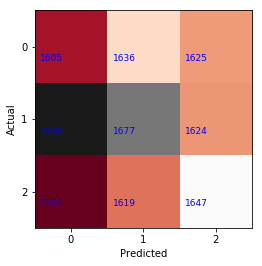

In [14]:
# Random 3-class predictions
show_results(res['Y'], res['Y_rand3'])

Error rate: 65.2%
             precision    recall  f1-score   support

          0       0.33      0.33      0.33      4866
          1       0.37      0.37      0.37      4995
          2       0.34      0.34      0.34      4863

avg / total       0.35      0.35      0.35     14724

[[1616 1596 1654]
 [1607 1845 1543]
 [1642 1551 1670]]


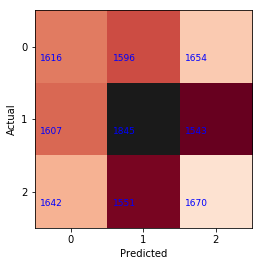

In [15]:
# Reversal predictions 
show_results(res['Y'], res['Y_rev'])

Error rate: 64.6%
             precision    recall  f1-score   support

          0       0.33      0.26      0.29      4866
          1       0.38      0.37      0.38      4995
          2       0.35      0.43      0.39      4863

avg / total       0.35      0.35      0.35     14724

[[1260 1585 2021]
 [1257 1865 1873]
 [1292 1483 2088]]


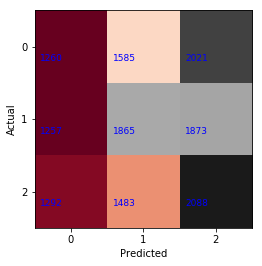

In [16]:
# Network predictions
show_results(res['Y'],res['Y_pred'])

Error rate: 67.0%
             precision    recall  f1-score   support

          0       0.32      0.28      0.30      4866
          1       0.34      0.34      0.34      4995
          2       0.33      0.37      0.35      4863

avg / total       0.33      0.33      0.33     14724

[[1378 1672 1816]
 [1489 1681 1825]
 [1415 1647 1801]]


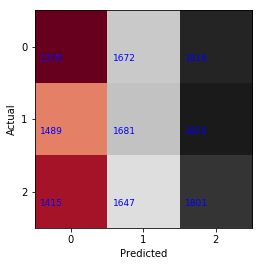

In [14]:
# Network predictions from V3
show_results(res['Y'],res['Y_pred'])

Error rate: 64.4%
             precision    recall  f1-score   support

          0       0.33      0.26      0.29      4866
          1       0.37      0.49      0.42      4995
          2       0.36      0.32      0.34      4863

avg / total       0.35      0.36      0.35     14724

[[1260 2137 1469]
 [1258 2435 1302]
 [1293 2025 1545]]


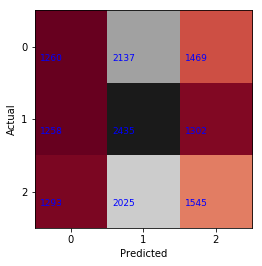

In [17]:
import warnings
warnings.filterwarnings('ignore')
# A more stringent version of prediction
# Predict 0s and 2s only if the associated probability is above a treshold
t1 = res[['Date','YR','Y','pr_0','pr_1','pr_2','Y_pred']]
t1['best'] = res[['pr_0','pr_1','pr_2']].idxmax(axis=1)
t1['Y_newpred'] = 1 # default
t1['Y_newpred'][(t1['best'] == 'pr_0')] = 0
t1['Y_newpred'][(t1['best'] == 'pr_0') &  (t1['pr_0'] >= 0.50)] = 0
t1['Y_newpred'][(t1['best'] == 'pr_2') &  (t1['pr_2'] >= 0.50)] = 2
show_results(t1['Y'], t1['Y_newpred'])

2015-03-12
Error rate: 65.5%
             precision    recall  f1-score   support

          0       0.33      0.41      0.36       135
          1       0.40      0.15      0.22       139
          2       0.34      0.48      0.40       135

avg / total       0.36      0.34      0.33       409

[[55 13 67]
 [60 21 58]
 [52 18 65]]


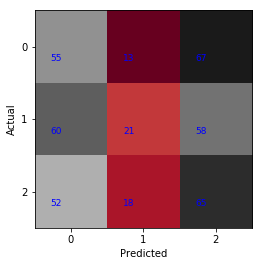

2015-04-10
Error rate: 61.6%
             precision    recall  f1-score   support

          0       0.42      0.11      0.17       136
          1       0.39      0.31      0.35       138
          2       0.38      0.73      0.50       135

avg / total       0.40      0.38      0.34       409

[[15 39 82]
 [12 43 83]
 [ 9 27 99]]


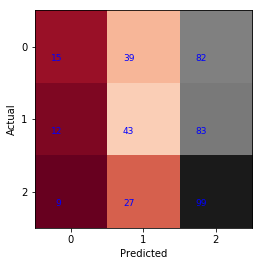

2015-05-08
Error rate: 66.3%
             precision    recall  f1-score   support

          0       0.21      0.07      0.10       135
          1       0.36      0.53      0.43       139
          2       0.34      0.41      0.37       135

avg / total       0.31      0.34      0.30       409

[[ 9 73 53]
 [11 74 54]
 [22 58 55]]


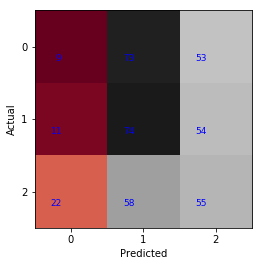

2015-06-08
Error rate: 67.2%
             precision    recall  f1-score   support

          0       0.28      0.35      0.31       135
          1       0.53      0.24      0.33       139
          2       0.30      0.40      0.34       135

avg / total       0.37      0.33      0.33       409

[[47  8 80]
 [59 33 47]
 [60 21 54]]


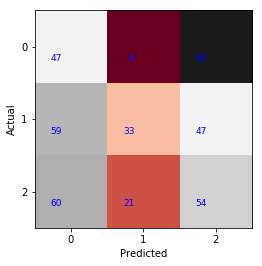

2015-07-07
Error rate: 66.0%
             precision    recall  f1-score   support

          0       0.28      0.10      0.14       135
          1       0.39      0.64      0.48       139
          2       0.28      0.27      0.28       135

avg / total       0.32      0.34      0.30       409

[[13 63 59]
 [13 89 37]
 [21 77 37]]


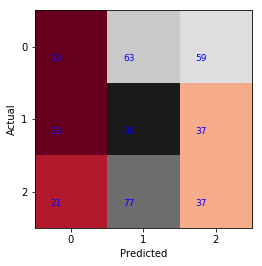

2015-08-04
Error rate: 63.6%
             precision    recall  f1-score   support

          0       0.33      0.16      0.22       135
          1       0.46      0.24      0.31       139
          2       0.35      0.70      0.46       135

avg / total       0.38      0.36      0.33       409

[[22 16 97]
 [26 33 80]
 [19 22 94]]


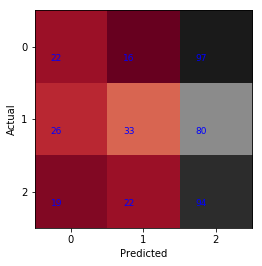

2015-09-01
Error rate: 63.1%
             precision    recall  f1-score   support

          0       0.52      0.08      0.14       135
          1       0.40      0.57      0.47       139
          2       0.32      0.45      0.37       135

avg / total       0.41      0.37      0.33       409

[[11 47 77]
 [ 6 79 54]
 [ 4 70 61]]


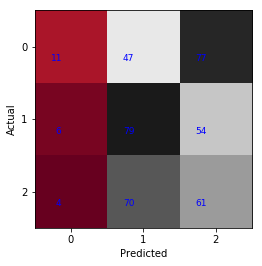

2015-09-30
Error rate: 71.6%
             precision    recall  f1-score   support

          0       0.28      0.67      0.39       135
          1       0.20      0.04      0.07       139
          2       0.37      0.14      0.20       135

avg / total       0.28      0.28      0.22       409

[[ 91  22  22]
 [123   6  10]
 [114   2  19]]


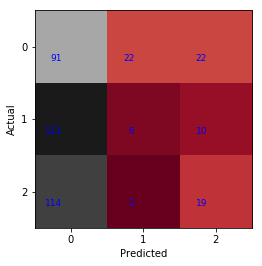

2015-10-28
Error rate: 63.1%
             precision    recall  f1-score   support

          0       0.32      0.06      0.10       135
          1       0.36      0.86      0.51       139
          2       0.43      0.17      0.24       135

avg / total       0.37      0.37      0.29       409

[[  8 111  16]
 [  5 120  14]
 [ 12 100  23]]


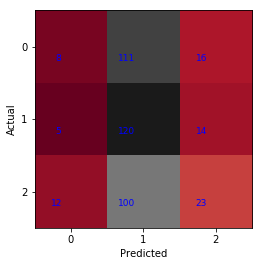

2015-11-25
Error rate: 63.3%
             precision    recall  f1-score   support

          0       0.52      0.10      0.17       135
          1       0.34      0.37      0.35       139
          2       0.37      0.63      0.47       135

avg / total       0.41      0.37      0.33       409

[[14 58 63]
 [ 6 51 82]
 [ 7 43 85]]


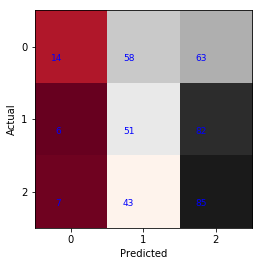

2015-12-24
Error rate: 62.1%
             precision    recall  f1-score   support

          0       0.47      0.50      0.48       135
          1       0.32      0.18      0.23       139
          2       0.34      0.47      0.39       135

avg / total       0.37      0.38      0.37       409

[[67 14 54]
 [43 25 71]
 [33 39 63]]


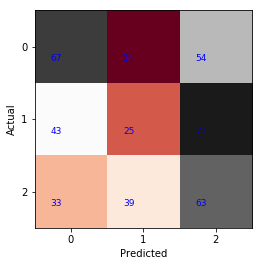

2016-01-26
Error rate: 66.0%
             precision    recall  f1-score   support

          0       0.35      0.43      0.39       136
          1       0.35      0.20      0.25       138
          2       0.33      0.39      0.36       135

avg / total       0.34      0.34      0.33       409

[[59 20 57]
 [58 27 53]
 [51 31 53]]


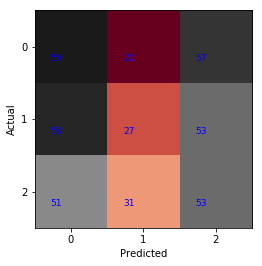

2016-02-24
Error rate: 65.5%
             precision    recall  f1-score   support

          0       0.31      0.51      0.39       135
          1       0.41      0.37      0.39       139
          2       0.34      0.16      0.21       135

avg / total       0.35      0.34      0.33       409

[[69 44 22]
 [70 51 18]
 [84 30 21]]


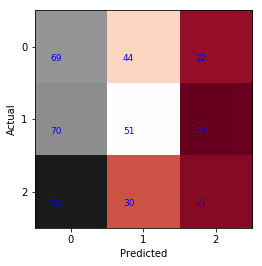

2016-03-23
Error rate: 62.3%
             precision    recall  f1-score   support

          0       0.31      0.07      0.12       136
          1       0.37      0.88      0.52       138
          2       0.51      0.16      0.25       135

avg / total       0.40      0.38      0.30       409

[[ 10 117   9]
 [  4 122  12]
 [ 18  95  22]]


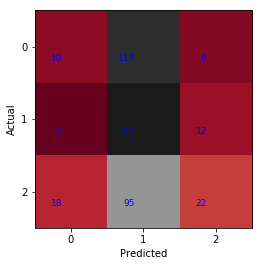

2016-04-21
Error rate: 68.0%
             precision    recall  f1-score   support

          0       0.36      0.03      0.05       135
          1       0.35      0.47      0.40       139
          2       0.29      0.46      0.36       135

avg / total       0.34      0.32      0.27       409

[[ 4 51 80]
 [ 3 65 71]
 [ 4 69 62]]


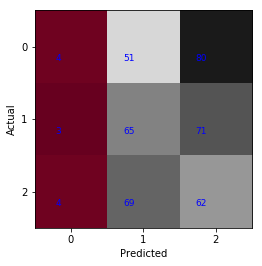

2016-05-19
Error rate: 67.7%
             precision    recall  f1-score   support

          0       0.31      0.10      0.16       135
          1       0.39      0.52      0.44       139
          2       0.26      0.34      0.29       135

avg / total       0.32      0.32      0.30       409

[[14 45 76]
 [12 72 55]
 [19 70 46]]


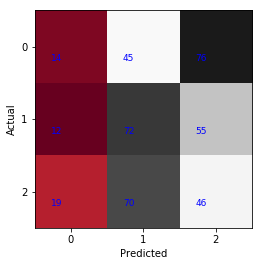

2016-06-17
Error rate: 63.3%
             precision    recall  f1-score   support

          0       0.35      0.61      0.45       135
          1       0.42      0.24      0.30       139
          2       0.35      0.26      0.30       135

avg / total       0.38      0.37      0.35       409

[[82 26 27]
 [69 33 37]
 [81 19 35]]


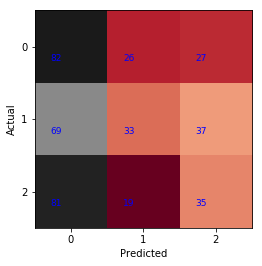

2016-07-18
Error rate: 67.5%
             precision    recall  f1-score   support

          0       0.10      0.01      0.01       135
          1       0.37      0.53      0.44       139
          2       0.29      0.43      0.35       135

avg / total       0.25      0.33      0.27       409

[[ 1 58 76]
 [ 1 74 64]
 [ 8 69 58]]


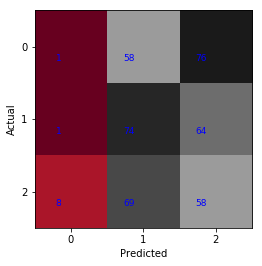

2016-08-15
Error rate: 63.1%
             precision    recall  f1-score   support

          0       0.25      0.12      0.16       135
          1       0.36      0.55      0.44       139
          2       0.43      0.43      0.43       135

avg / total       0.35      0.37      0.34       409

[[16 72 47]
 [32 77 30]
 [15 62 58]]


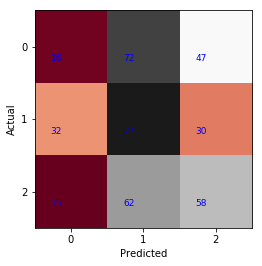

2016-09-13
Error rate: 61.4%
             precision    recall  f1-score   support

          0       0.32      0.44      0.37       135
          1       0.41      0.37      0.39       139
          2       0.47      0.36      0.41       135

avg / total       0.40      0.39      0.39       409

[[59 46 30]
 [64 51 24]
 [61 26 48]]


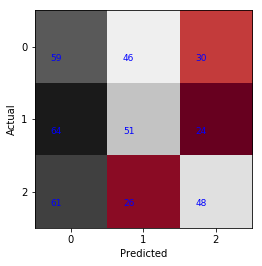

2016-10-11
Error rate: 64.5%
             precision    recall  f1-score   support

          0       0.35      0.29      0.32       137
          1       0.37      0.45      0.41       136
          2       0.33      0.32      0.33       136

avg / total       0.35      0.35      0.35       409

[[40 46 51]
 [37 61 38]
 [36 56 44]]


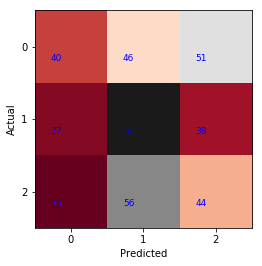

2016-11-08
Error rate: 71.6%
             precision    recall  f1-score   support

          0       0.16      0.14      0.15       135
          1       0.41      0.40      0.40       139
          2       0.27      0.31      0.29       135

avg / total       0.28      0.28      0.28       409

[[19 45 71]
 [39 55 45]
 [59 34 42]]


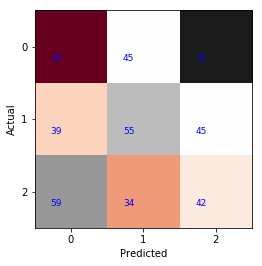

2016-12-07
Error rate: 62.6%
             precision    recall  f1-score   support

          0       0.16      0.04      0.07       135
          1       0.37      0.50      0.43       139
          2       0.42      0.57      0.49       135

avg / total       0.32      0.37      0.33       409

[[ 6 74 55]
 [19 70 50]
 [12 46 77]]


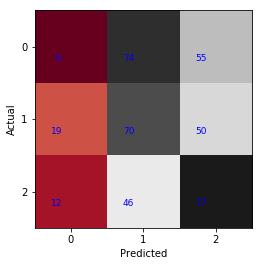

2017-01-06
Error rate: 63.8%
             precision    recall  f1-score   support

          0       0.33      0.32      0.32       135
          1       0.36      0.23      0.28       139
          2       0.39      0.54      0.45       135

avg / total       0.36      0.36      0.35       409

[[43 28 64]
 [55 32 52]
 [32 30 73]]


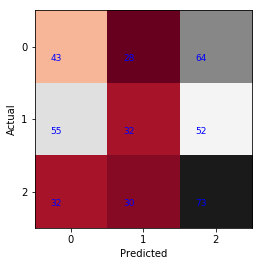

2017-02-06
Error rate: 58.4%
             precision    recall  f1-score   support

          0       0.49      0.55      0.52       135
          1       0.41      0.43      0.42       138
          2       0.33      0.26      0.29       136

avg / total       0.41      0.42      0.41       409

[[74 30 31]
 [35 60 43]
 [43 57 36]]


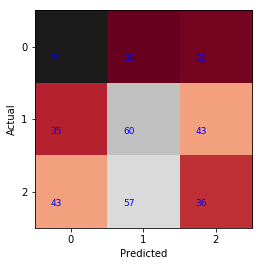

2017-03-07
Error rate: 70.2%
             precision    recall  f1-score   support

          0       0.29      0.44      0.35       136
          1       0.34      0.13      0.19       138
          2       0.30      0.33      0.31       135

avg / total       0.31      0.30      0.28       409

[[60 20 56]
 [73 18 47]
 [76 15 44]]


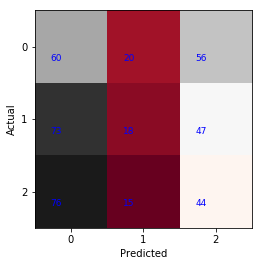

2017-04-04
Error rate: 59.9%
             precision    recall  f1-score   support

          0       0.41      0.24      0.30       135
          1       0.42      0.37      0.39       139
          2       0.39      0.60      0.47       135

avg / total       0.40      0.40      0.39       409

[[32 41 62]
 [22 51 66]
 [25 29 81]]


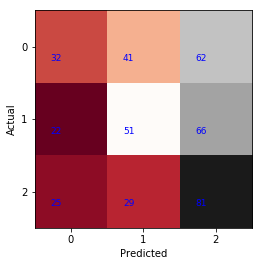

2017-05-02
Error rate: 60.9%
             precision    recall  f1-score   support

          0       0.48      0.33      0.39       135
          1       0.43      0.12      0.18       139
          2       0.36      0.73      0.48       135

avg / total       0.42      0.39      0.35       409

[[45  9 81]
 [25 16 98]
 [24 12 99]]


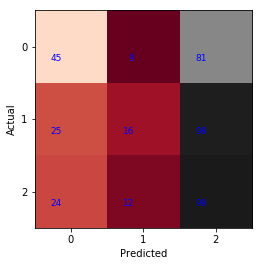

2017-05-31
Error rate: 61.1%
             precision    recall  f1-score   support

          0       0.37      0.23      0.28       135
          1       0.39      0.48      0.43       139
          2       0.39      0.45      0.42       135

avg / total       0.39      0.39      0.38       409

[[31 59 45]
 [23 67 49]
 [30 44 61]]


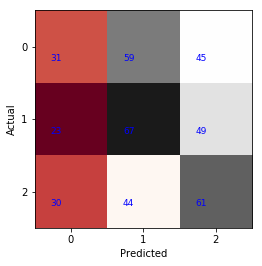

2017-06-28
Error rate: 68.2%
             precision    recall  f1-score   support

          0       0.24      0.30      0.27       135
          1       0.40      0.38      0.39       138
          2       0.33      0.26      0.29       136

avg / total       0.33      0.32      0.32       409

[[41 47 47]
 [58 53 27]
 [69 31 36]]


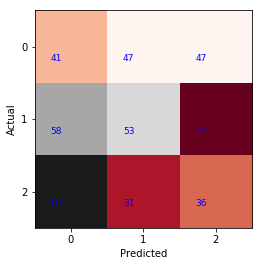

2017-07-27
Error rate: 66.5%
             precision    recall  f1-score   support

          0       0.39      0.16      0.23       135
          1       0.30      0.22      0.26       139
          2       0.34      0.62      0.44       135

avg / total       0.34      0.33      0.31       409

[[22 31 82]
 [24 31 84]
 [11 40 84]]


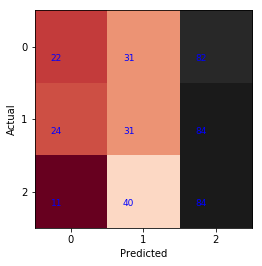

2017-08-24
Error rate: 65.8%
             precision    recall  f1-score   support

          0       0.21      0.06      0.09       135
          1       0.35      0.17      0.23       139
          2       0.36      0.80      0.50       135

avg / total       0.30      0.34      0.27       409

[[  8  35  92]
 [ 14  24 101]
 [ 17  10 108]]


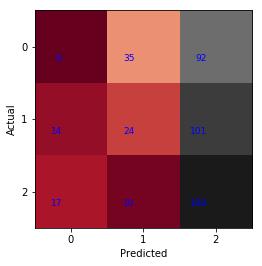

2017-09-22
Error rate: 63.1%
             precision    recall  f1-score   support

          0       0.36      0.50      0.42       135
          1       0.42      0.13      0.20       139
          2       0.37      0.48      0.42       135

avg / total       0.38      0.37      0.34       409

[[68 14 53]
 [64 18 57]
 [59 11 65]]


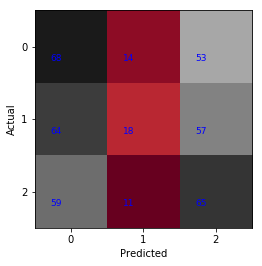

2017-10-20
Error rate: 65.3%
             precision    recall  f1-score   support

          0       0.39      0.18      0.24       135
          1       0.36      0.53      0.43       139
          2       0.31      0.33      0.32       135

avg / total       0.35      0.35      0.33       409

[[24 63 48]
 [15 73 51]
 [22 68 45]]


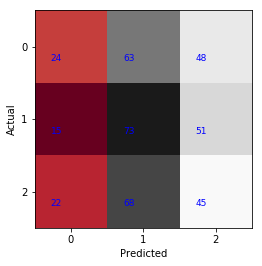

2017-11-20
Error rate: 65.0%
             precision    recall  f1-score   support

          0       0.29      0.19      0.23       135
          1       0.34      0.24      0.28       139
          2       0.38      0.62      0.47       135

avg / total       0.34      0.35      0.33       409

[[26 47 62]
 [30 33 76]
 [34 17 84]]


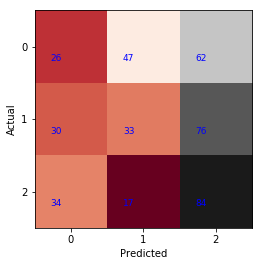

2017-12-19
Error rate: 60.1%
             precision    recall  f1-score   support

          0       0.36      0.41      0.38       135
          1       0.39      0.41      0.40       139
          2       0.45      0.38      0.41       135

avg / total       0.40      0.40      0.40       409

[[55 53 27]
 [47 57 35]
 [49 35 51]]


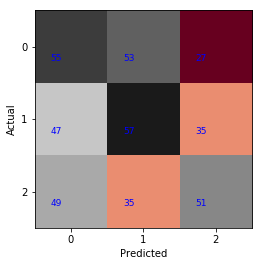

In [18]:
# Model performance for each date
dates = res['Date'].drop_duplicates()
dates = sorted(dates)
#print(dates)

for testdate in dates: 
    y_true = res[res['Date'] == testdate]['Y']
    y_pred = res[res['Date'] == testdate]['Y_pred']
    print testdate
    show_results(y_true, y_pred)

In [19]:
# Comparisons of summary statistics for outcome and predictions
res.describe()

,V,P,AV,R,DRSD,YR,Y,pr_0,pr_1,pr_2,Y_pred,Y_mom,Y_rev,Y_rand3
count,"14,724.0000","14,724.0000","14,724.0000","14,724.0000","14,724.0000","14,724.0000","14,724.0000","14,724.0000","14,724.0000","14,724.0000","14,724.0000","14,724.0000","14,724.0000","14,724.0000"
mean,243.1723,86.6897,244.9557,0.0095,0.0143,0.0105,0.9998,0.2889,0.3277,0.3835,1.1476,0.9999,1.0001,1.0000
std,416.0490,103.6464,361.2287,0.0694,0.0076,0.0700,0.8129,0.2081,0.2205,0.2208,0.8020,0.8130,0.8130,0.8155
min,6.7100,1.7100,14.4640,-0.4452,0.0025,-0.4452,0.0000,0.0003,0.0000,0.0048,0.0000,0.0000,0.0000,0.0000
25%,80.5300,41.5000,94.4298,-0.0284,0.0095,-0.0279,0.0000,0.1205,0.1453,0.2044,0.0000,0.0000,0.0000,0.0000
50%,139.3100,64.8800,148.9382,0.0097,0.0125,0.0108,1.0000,0.2391,0.2909,0.3510,1.0000,1.0000,1.0000,1.0000
75%,258.6000,100.7825,262.0460,0.0471,0.0170,0.0484,2.0000,0.4163,0.4795,0.5357,2.0000,2.0000,2.0000,2.0000
max,"14,231.2500","2,025.0900","8,286.6045",0.7143,0.1271,0.7143,2.0000,0.9945,0.9733,0.9995,2.0000,2.0000,2.0000,2.0000


In [20]:
# Actual outcomes
res_Y = res.groupby(['Date','Y'])['YR']\
            .agg({'Y_mean': np.mean, 'Y_median': np.median,\
                  'Y_min': np.min, 'Y_max': np.max,\
                  'Y_std': np.std, 'Y_size': np.size })
res_Y.index = res_Y.index.set_names('DMU', level=1)

In [21]:
# Network prediction
res_Y_pred = res.groupby(['Date','Y_pred'])['YR']\
            .agg({'Y_pred_mean': np.mean, 'Y_pred_median': np.median,\
                  'Y_pred_min': np.min, 'Y_pred_max': np.max,\
                  'Y_pred_std': np.std, 'Y_pred_size': np.size })
res_Y_pred.index = res_Y_pred.index.set_names('DMU', level=1)

In [22]:
# Reversal prediction
res_Y_rev = res.groupby(['Date','Y_rev'])['YR']\
            .agg({'Y_rev_mean': np.mean, 'Y_rev_median': np.median,\
                  'Y_rev_min': np.min, 'Y_rev_max': np.max,\
                  'Y_rev_std': np.std, 'Y_rev_size': np.size })
res_Y_rev.index = res_Y_rev.index.set_names('DMU', level=1)

In [23]:
# Random 3 prediction
res_Y_rand3 = res.groupby(['Date','Y_rand3'])['YR']\
            .agg({'Y_rand3_mean': np.mean, 'Y_rand3_median': np.median,\
                  'Y_rand3_min': np.min, 'Y_rand3_max': np.max,\
                  'Y_rand3_std': np.std, 'Y_rand3_size': np.size })
res_Y_rand3.index = res_Y_rand3.index.set_names('DMU', level=1)

In [24]:
#r1 = pd.concat([res_Y,res_Y_pred],ignore_index=False)
r1 = res_Y.join(res_Y_pred, how='inner')
r2 = r1.join(res_Y_rev, how='inner')
r3 = r2.join(res_Y_rand3, how='inner')
r3.reset_index(level=0, inplace=True) # There are two indices
r3.reset_index(level=0, inplace=True)

In [25]:
display(r3)
#r3.to_csv('SP500_SummaryStats.CSV', index = False, float_format='%.4f')

,DMU,Date,Y_mean,Y_min,Y_size,Y_std,Y_max,Y_median,Y_pred_median,Y_pred_min,...,Y_rev_min,Y_rev_mean,Y_rev_median,Y_rev_size,Y_rand3_median,Y_rand3_min,Y_rand3_max,Y_rand3_mean,Y_rand3_size,Y_rand3_std
0,0,2015-03-12,-0.0190,-0.1188,135.0000,0.0183,0.0020,-0.0151,0.0165,-0.0594,...,-0.1188,0.0223,0.0161,135.0000,0.0154,-0.0477,0.2170,0.0231,136.0000,0.0434
1,1,2015-03-12,0.0165,0.0022,139.0000,0.0083,0.0315,0.0165,0.0155,-0.1188,...,-0.0762,0.0152,0.0085,139.0000,0.0185,-0.1188,0.1550,0.0217,137.0000,0.0443
2,2,2015-03-12,0.0724,0.0317,135.0000,0.0385,0.2170,0.0613,0.0169,-0.0762,...,-0.0594,0.0324,0.0212,135.0000,0.0166,-0.0555,0.1958,0.0249,136.0000,0.0476
3,0,2015-04-10,-0.0517,-0.1630,136.0000,0.0286,-0.0220,-0.0428,-0.0158,-0.1630,...,-0.1425,-0.0092,-0.0108,135.0000,-0.0034,-0.1630,0.1635,-0.0023,136.0000,0.0468
4,1,2015-04-10,-0.0036,-0.0216,138.0000,0.0100,0.0127,-0.0023,-0.0112,-0.1082,...,-0.1521,-0.0013,-0.0015,139.0000,-0.0064,-0.1521,0.1445,-0.0016,137.0000,0.0527
5,2,2015-04-10,0.0531,0.0128,135.0000,0.0384,0.2758,0.0409,0.0014,-0.1521,...,-0.1630,0.0078,0.0036,135.0000,-0.0001,-0.1425,0.2758,0.0011,136.0000,0.0540
6,0,2015-05-08,-0.0579,-0.1669,135.0000,0.0269,-0.0325,-0.0496,0.0036,-0.0852,...,-0.1669,-0.0066,-0.0068,135.0000,-0.0186,-0.1632,0.1014,-0.0155,136.0000,0.0432
7,1,2015-05-08,-0.0159,-0.0315,139.0000,0.0102,0.0024,-0.0168,-0.0204,-0.1498,...,-0.1632,-0.0181,-0.0215,138.0000,-0.0232,-0.1139,0.1170,-0.0163,137.0000,0.0415
8,2,2015-05-08,0.0322,0.0030,135.0000,0.0316,0.2647,0.0241,-0.0174,-0.1669,...,-0.1498,-0.0168,-0.0231,136.0000,-0.0109,-0.1669,0.2647,-0.0099,136.0000,0.0476
9,0,2015-06-08,-0.0491,-0.2978,135.0000,0.0353,-0.0164,-0.0367,0.0034,-0.1018,...,-0.1175,0.0046,-0.0004,135.0000,0.0005,-0.2978,0.2067,0.0014,136.0000,0.0568


In [26]:
r3.describe()

,DMU,Y_mean,Y_min,Y_size,Y_std,Y_max,Y_median,Y_pred_median,Y_pred_min,Y_pred_size,...,Y_rev_min,Y_rev_mean,Y_rev_median,Y_rev_size,Y_rand3_median,Y_rand3_min,Y_rand3_max,Y_rand3_mean,Y_rand3_size,Y_rand3_std
count,108.0000,108.0000,108.0000,108.0000,108.0000,108.0000,108.0000,108.0000,108.0000,108.0000,...,108.0000,108.0000,108.0000,108.0000,108.0000,108.0000,108.0000,108.0000,108.0000,108.0000
mean,1.0000,0.0105,-0.0697,136.3333,0.0305,0.1035,0.0104,0.0112,-0.1755,136.3333,...,-0.1811,0.0105,0.0107,136.3333,0.0110,-0.1846,0.2178,0.0105,136.3333,0.0604
std,0.8203,0.0615,0.1254,1.7773,0.0159,0.1520,0.0531,0.0346,0.0778,75.4351,...,0.0728,0.0341,0.0329,1.7401,0.0319,0.0724,0.0988,0.0329,0.4736,0.0142
min,0.0000,-0.1691,-0.4452,135.0000,0.0077,-0.1016,-0.1466,-0.0983,-0.4452,10.0000,...,-0.4452,-0.1038,-0.0974,135.0000,-0.0814,-0.4452,0.0603,-0.0839,136.0000,0.0366
25%,0.0000,-0.0348,-0.1812,135.0000,0.0135,-0.0013,-0.0296,-0.0036,-0.2197,70.5000,...,-0.2144,-0.0048,-0.0044,135.0000,-0.0013,-0.2170,0.1523,0.0000,136.0000,0.0501
50%,1.0000,0.0104,-0.0146,135.0000,0.0306,0.0326,0.0105,0.0117,-0.1649,134.5000,...,-0.1711,0.0102,0.0097,135.0000,0.0111,-0.1749,0.2066,0.0078,136.0000,0.0599
75%,2.0000,0.0582,0.0269,139.0000,0.0425,0.2142,0.0475,0.0275,-0.1222,188.2500,...,-0.1428,0.0313,0.0285,138.2500,0.0296,-0.1400,0.2459,0.0287,137.0000,0.0662
max,2.0000,0.1874,0.1052,139.0000,0.0718,0.7143,0.1727,0.1052,-0.0242,334.0000,...,-0.0225,0.0889,0.0887,139.0000,0.0804,-0.0477,0.7143,0.0789,137.0000,0.1139


In [27]:
# Convert to "wide format" so that for each date, 
# we can look at summary statistics across Up/Mid/Down classes
r3_wide = r3.pivot(index='Date', columns='DMU')

r3_wide.columns = [''.join(str(col)).strip() for col in r3_wide.columns.values]
cols =list(r3_wide.columns.values)
r3_wide.columns = [col.replace(',', '') for col in r3_wide.columns]
r3_wide.columns = [col.replace(')', '') for col in r3_wide.columns]
r3_wide.columns = [col.replace('(', '') for col in r3_wide.columns]
r3_wide.columns = [col.replace('"', '') for col in r3_wide.columns]
r3_wide.columns = [col.replace("'", '') for col in r3_wide.columns]
r3_wide.columns = [col.replace(' ', '') for col in r3_wide.columns]
r3_wide.reset_index(inplace=True)
#print r3_wide.shape
display(r3_wide)

,Date,Y_mean0,Y_mean1,Y_mean2,Y_min0,Y_min1,Y_min2,Y_size0,Y_size1,Y_size2,...,Y_rand3_max2,Y_rand3_mean0,Y_rand3_mean1,Y_rand3_mean2,Y_rand3_size0,Y_rand3_size1,Y_rand3_size2,Y_rand3_std0,Y_rand3_std1,Y_rand3_std2
0,2015-03-12,-0.0190,0.0165,0.0724,-0.1188,0.0022,0.0317,135.0000,139.0000,135.0000,...,0.1958,0.0231,0.0217,0.0249,136.0000,137.0000,136.0000,0.0434,0.0443,0.0476
1,2015-04-10,-0.0517,-0.0036,0.0531,-0.1630,-0.0216,0.0128,136.0000,138.0000,135.0000,...,0.2758,-0.0023,-0.0016,0.0011,136.0000,137.0000,136.0000,0.0468,0.0527,0.0540
2,2015-05-08,-0.0579,-0.0159,0.0322,-0.1669,-0.0315,0.0030,135.0000,139.0000,135.0000,...,0.2647,-0.0155,-0.0163,-0.0099,136.0000,137.0000,136.0000,0.0432,0.0415,0.0476
3,2015-06-08,-0.0491,0.0014,0.0569,-0.2978,-0.0163,0.0217,135.0000,139.0000,135.0000,...,0.1890,0.0014,0.0019,0.0059,136.0000,137.0000,136.0000,0.0568,0.0474,0.0549
4,2015-07-07,-0.0720,0.0100,0.0673,-0.3579,-0.0196,0.0312,135.0000,139.0000,135.0000,...,0.1653,0.0057,0.0043,-0.0044,136.0000,137.0000,136.0000,0.0627,0.0647,0.0795
5,2015-08-04,-0.1254,-0.0782,-0.0260,-0.2251,-0.0977,-0.0592,135.0000,139.0000,135.0000,...,0.1090,-0.0739,-0.0802,-0.0755,136.0000,137.0000,136.0000,0.0493,0.0410,0.0527
6,2015-09-01,-0.0631,0.0057,0.0642,-0.2064,-0.0178,0.0275,135.0000,139.0000,135.0000,...,0.1124,-0.0006,0.0063,0.0013,136.0000,137.0000,136.0000,0.0618,0.0617,0.0549
7,2015-09-30,-0.0033,0.0794,0.1456,-0.1805,0.0517,0.1013,135.0000,139.0000,135.0000,...,0.2438,0.0708,0.0763,0.0748,136.0000,137.0000,136.0000,0.0676,0.0765,0.0678
8,2015-10-28,-0.0551,0.0063,0.0626,-0.3124,-0.0121,0.0267,135.0000,139.0000,135.0000,...,0.1658,0.0098,0.0044,-0.0004,136.0000,137.0000,136.0000,0.0565,0.0527,0.0676
9,2015-11-25,-0.0812,-0.0114,0.0420,-0.3011,-0.0347,0.0118,135.0000,139.0000,135.0000,...,0.1356,-0.0177,-0.0158,-0.0169,136.0000,137.0000,136.0000,0.0618,0.0558,0.0625


In [28]:
# Long - Short portfolios
r3_wide['Y_'] = r3_wide['Y_mean2'] - r3_wide['Y_mean0']
r3_wide['Y_pred'] = r3_wide['Y_pred_mean2'] - r3_wide['Y_pred_mean0']
r3_wide['Y_rev'] = r3_wide['Y_rev_mean2'] - r3_wide['Y_rev_mean0']
r3_wide['Y_rand3'] = r3_wide['Y_rand3_mean2'] - r3_wide['Y_rand3_mean0']
display(r3_wide)

,Date,Y_mean0,Y_mean1,Y_mean2,Y_min0,Y_min1,Y_min2,Y_size0,Y_size1,Y_size2,...,Y_rand3_size0,Y_rand3_size1,Y_rand3_size2,Y_rand3_std0,Y_rand3_std1,Y_rand3_std2,Y_,Y_pred,Y_rev,Y_rand3
0,2015-03-12,-0.0190,0.0165,0.0724,-0.1188,0.0022,0.0317,135.0000,139.0000,135.0000,...,136.0000,137.0000,136.0000,0.0434,0.0443,0.0476,0.0915,0.0062,0.0101,0.0018
1,2015-04-10,-0.0517,-0.0036,0.0531,-0.1630,-0.0216,0.0128,136.0000,138.0000,135.0000,...,136.0000,137.0000,136.0000,0.0468,0.0527,0.0540,0.1048,0.0195,0.0169,0.0034
2,2015-05-08,-0.0579,-0.0159,0.0322,-0.1669,-0.0315,0.0030,135.0000,139.0000,135.0000,...,136.0000,137.0000,136.0000,0.0432,0.0415,0.0476,0.0902,-0.0222,-0.0101,0.0056
3,2015-06-08,-0.0491,0.0014,0.0569,-0.2978,-0.0163,0.0217,135.0000,139.0000,135.0000,...,136.0000,137.0000,136.0000,0.0568,0.0474,0.0549,0.1060,-0.0174,-0.0083,0.0046
4,2015-07-07,-0.0720,0.0100,0.0673,-0.3579,-0.0196,0.0312,135.0000,139.0000,135.0000,...,136.0000,137.0000,136.0000,0.0627,0.0647,0.0795,0.1393,-0.0306,-0.0431,-0.0101
5,2015-08-04,-0.1254,-0.0782,-0.0260,-0.2251,-0.0977,-0.0592,135.0000,139.0000,135.0000,...,136.0000,137.0000,136.0000,0.0493,0.0410,0.0527,0.0993,0.0038,0.0078,-0.0017
6,2015-09-01,-0.0631,0.0057,0.0642,-0.2064,-0.0178,0.0275,135.0000,139.0000,135.0000,...,136.0000,137.0000,136.0000,0.0618,0.0617,0.0549,0.1273,0.0238,-0.0212,0.0019
7,2015-09-30,-0.0033,0.0794,0.1456,-0.1805,0.0517,0.1013,135.0000,139.0000,135.0000,...,136.0000,137.0000,136.0000,0.0676,0.0765,0.0678,0.1489,-0.0095,0.0104,0.0039
8,2015-10-28,-0.0551,0.0063,0.0626,-0.3124,-0.0121,0.0267,135.0000,139.0000,135.0000,...,136.0000,137.0000,136.0000,0.0565,0.0527,0.0676,0.1178,0.0001,0.0023,-0.0102
9,2015-11-25,-0.0812,-0.0114,0.0420,-0.3011,-0.0347,0.0118,135.0000,139.0000,135.0000,...,136.0000,137.0000,136.0000,0.0618,0.0558,0.0625,0.1232,0.0416,0.0084,0.0007


In [29]:
print list(r3_wide)
t1 = r3_wide[['Date','Y_mean2','Y_mean0','Y_','Y_pred_mean2','Y_pred_mean0','Y_pred','Y_rev_mean2','Y_rev_mean0','Y_rev', 'Y_rand3_mean2','Y_rand3_mean0','Y_rand3']]
t1.describe()

['Date', 'Y_mean0', 'Y_mean1', 'Y_mean2', 'Y_min0', 'Y_min1', 'Y_min2', 'Y_size0', 'Y_size1', 'Y_size2', 'Y_std0', 'Y_std1', 'Y_std2', 'Y_max0', 'Y_max1', 'Y_max2', 'Y_median0', 'Y_median1', 'Y_median2', 'Y_pred_median0', 'Y_pred_median1', 'Y_pred_median2', 'Y_pred_min0', 'Y_pred_min1', 'Y_pred_min2', 'Y_pred_size0', 'Y_pred_size1', 'Y_pred_size2', 'Y_pred_mean0', 'Y_pred_mean1', 'Y_pred_mean2', 'Y_pred_max0', 'Y_pred_max1', 'Y_pred_max2', 'Y_pred_std0', 'Y_pred_std1', 'Y_pred_std2', 'Y_rev_max0', 'Y_rev_max1', 'Y_rev_max2', 'Y_rev_std0', 'Y_rev_std1', 'Y_rev_std2', 'Y_rev_min0', 'Y_rev_min1', 'Y_rev_min2', 'Y_rev_mean0', 'Y_rev_mean1', 'Y_rev_mean2', 'Y_rev_median0', 'Y_rev_median1', 'Y_rev_median2', 'Y_rev_size0', 'Y_rev_size1', 'Y_rev_size2', 'Y_rand3_median0', 'Y_rand3_median1', 'Y_rand3_median2', 'Y_rand3_min0', 'Y_rand3_min1', 'Y_rand3_min2', 'Y_rand3_max0', 'Y_rand3_max1', 'Y_rand3_max2', 'Y_rand3_mean0', 'Y_rand3_mean1', 'Y_rand3_mean2', 'Y_rand3_size0', 'Y_rand3_size1', 'Y_ran

,Y_mean2,Y_mean0,Y_,Y_pred_mean2,Y_pred_mean0,Y_pred,Y_rev_mean2,Y_rev_mean0,Y_rev,Y_rand3_mean2,Y_rand3_mean0,Y_rand3
count,36.0000,36.0000,36.0000,36.0000,36.0000,36.0000,36.0000,36.0000,36.0000,36.0000,36.0000,36.0000
mean,0.0722,-0.0516,0.1238,0.0123,0.0122,0.0001,0.0102,0.0118,-0.0017,0.0108,0.0098,0.0009
std,0.0393,0.0338,0.0283,0.0352,0.0436,0.0229,0.0378,0.0324,0.0216,0.0337,0.0321,0.0066
min,-0.0260,-0.1691,0.0863,-0.0769,-0.1083,-0.0720,-0.1038,-0.0758,-0.0513,-0.0781,-0.0839,-0.0113
25%,0.0555,-0.0629,0.1022,-0.0060,-0.0060,-0.0095,-0.0078,-0.0046,-0.0100,0.0000,0.0000,-0.0018
50%,0.0685,-0.0483,0.1223,0.0115,0.0127,0.0044,0.0081,0.0140,0.0014,0.0064,0.0086,0.0018
75%,0.0883,-0.0326,0.1358,0.0281,0.0327,0.0109,0.0316,0.0265,0.0096,0.0274,0.0267,0.0050
max,0.1874,0.0107,0.2273,0.0917,0.1133,0.0416,0.0889,0.0723,0.0492,0.0789,0.0716,0.0144


In [30]:
# Model performance metrics by date
res_log = pd.read_csv('April2018GenerateResultsByDate.csv')
#display(res_log)
r3_wide = r3_wide.merge(res_log, how='left', on='Date', sort=False)
# Also attach SPY returns
r3_wide = r3_wide.merge(indices, how='left', on='Date', sort=False)
display(r3_wide)

,Date,Y_mean0,Y_mean1,Y_mean2,Y_min0,Y_min1,Y_min2,Y_size0,Y_size1,Y_size2,...,act0_pred2,act1_pred0,act1_pred1,act2_pred2,act2_pred0,act2_pred1,act2_pred2.1,SPY_R,SPY_YR,SPY_RT
0,2015-03-12,-0.0190,0.0165,0.0724,-0.1188,0.0022,0.0317,135.0000,139.0000,135.0000,...,67,60,21,58,52,18,65,0.0008,0.0187,-0.2723
1,2015-04-10,-0.0517,-0.0036,0.0531,-0.1630,-0.0216,0.0128,136.0000,138.0000,135.0000,...,82,12,43,83,9,27,99,0.0187,0.0075,0.1754
2,2015-05-08,-0.0579,-0.0159,0.0322,-0.1669,-0.0315,0.0030,135.0000,139.0000,135.0000,...,53,11,74,54,22,58,55,0.0075,-0.0151,-0.0824
3,2015-06-08,-0.0491,0.0014,0.0569,-0.2978,-0.0163,0.0217,135.0000,139.0000,135.0000,...,80,59,33,47,60,21,54,-0.0151,0.0029,-0.5936
4,2015-07-07,-0.0720,0.0100,0.0673,-0.3579,-0.0196,0.0312,135.0000,139.0000,135.0000,...,59,13,89,37,21,77,37,0.0029,0.0063,-0.0853
5,2015-08-04,-0.1254,-0.0782,-0.0260,-0.2251,-0.0977,-0.0592,135.0000,139.0000,135.0000,...,97,26,33,80,19,22,94,0.0063,-0.0838,-0.0064
6,2015-09-01,-0.0631,0.0057,0.0642,-0.2064,-0.0178,0.0275,135.0000,139.0000,135.0000,...,77,6,79,54,4,70,61,-0.0838,0.0043,-1.7897
7,2015-09-30,-0.0033,0.0794,0.1456,-0.1805,0.0517,0.1013,135.0000,139.0000,135.0000,...,22,123,6,10,114,2,19,0.0043,0.0906,-0.0124
8,2015-10-28,-0.0551,0.0063,0.0626,-0.3124,-0.0121,0.0267,135.0000,139.0000,135.0000,...,16,5,120,14,12,100,23,0.0906,0.0018,2.2154
9,2015-11-25,-0.0812,-0.0114,0.0420,-0.3011,-0.0347,0.0118,135.0000,139.0000,135.0000,...,63,6,51,82,7,43,85,0.0018,-0.0115,-0.1032


In [31]:
print list(r3_wide)

['Date', 'Y_mean0', 'Y_mean1', 'Y_mean2', 'Y_min0', 'Y_min1', 'Y_min2', 'Y_size0', 'Y_size1', 'Y_size2', 'Y_std0', 'Y_std1', 'Y_std2', 'Y_max0', 'Y_max1', 'Y_max2', 'Y_median0', 'Y_median1', 'Y_median2', 'Y_pred_median0', 'Y_pred_median1', 'Y_pred_median2', 'Y_pred_min0', 'Y_pred_min1', 'Y_pred_min2', 'Y_pred_size0', 'Y_pred_size1', 'Y_pred_size2', 'Y_pred_mean0', 'Y_pred_mean1', 'Y_pred_mean2', 'Y_pred_max0', 'Y_pred_max1', 'Y_pred_max2', 'Y_pred_std0', 'Y_pred_std1', 'Y_pred_std2', 'Y_rev_max0', 'Y_rev_max1', 'Y_rev_max2', 'Y_rev_std0', 'Y_rev_std1', 'Y_rev_std2', 'Y_rev_min0', 'Y_rev_min1', 'Y_rev_min2', 'Y_rev_mean0', 'Y_rev_mean1', 'Y_rev_mean2', 'Y_rev_median0', 'Y_rev_median1', 'Y_rev_median2', 'Y_rev_size0', 'Y_rev_size1', 'Y_rev_size2', 'Y_rand3_median0', 'Y_rand3_median1', 'Y_rand3_median2', 'Y_rand3_min0', 'Y_rand3_min1', 'Y_rand3_min2', 'Y_rand3_max0', 'Y_rand3_max1', 'Y_rand3_max2', 'Y_rand3_mean0', 'Y_rand3_mean1', 'Y_rand3_mean2', 'Y_rand3_size0', 'Y_rand3_size1', 'Y_ran

In [32]:
# Use this dataset for correlation heatmap
temp = r3_wide[['Date','Y_pred_size0', 'Y_pred_size1', 'Y_pred_size2','precision_0', 'precision_1', 'precision_2', 'recall_0', 'recall_1',  'recall_2', 'SPY_R', 'SPY_YR']]
temp.describe()

,Y_pred_size0,Y_pred_size1,Y_pred_size2,precision_0,precision_1,precision_2,recall_0,recall_1,recall_2,SPY_R,SPY_YR
count,36.0000,36.0000,36.0000,36.0000,36.0000,36.0000,36.0000,36.0000,36.0000,36.0000,36.0000
mean,105.8056,137.0278,166.1667,0.3306,0.3789,0.3558,0.2586,0.3736,0.4289,0.0095,0.0106
std,76.0886,74.2419,64.9666,0.0976,0.0518,0.0562,0.1870,0.1963,0.1728,0.0317,0.0324
min,10.0000,30.0000,43.0000,0.1000,0.2000,0.2600,0.0100,0.0400,0.1400,-0.0838,-0.0838
25%,41.2500,78.0000,128.0000,0.2800,0.3575,0.3275,0.1000,0.2275,0.3175,0.0016,0.0026
50%,87.0000,128.0000,169.0000,0.3300,0.3800,0.3450,0.2100,0.3700,0.4200,0.0099,0.0118
75%,166.2500,187.7500,200.7500,0.3750,0.4100,0.3825,0.4150,0.5050,0.5475,0.0209,0.0276
max,328.0000,334.0000,301.0000,0.5200,0.5300,0.5100,0.6700,0.8800,0.8000,0.0906,0.0906


In [40]:
!pip install seaborn

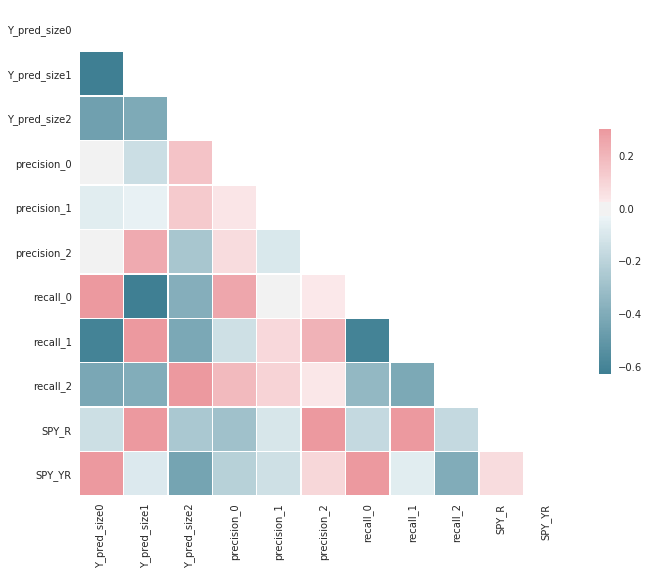

In [33]:
from string import ascii_letters
#import numpy as np
#import pandas as pd
import seaborn as sns
#import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset

d = temp

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [58]:
print corr

                     Y_pred_size0         Y_pred_size1         Y_pred_size2  \
Y_pred_size0               1.0000              -0.6267              -0.4550   
Y_pred_size1              -0.6267               1.0000              -0.4088   
Y_pred_size2              -0.4550              -0.4088               1.0000   
precision_0                0.0032              -0.1451               0.1620   
precision_1               -0.0711              -0.0456               0.1354   
precision_2               -0.0044               0.2398              -0.2688   
recall_0                   0.9408              -0.6286              -0.3835   
recall_1                  -0.6056               0.9884              -0.4203   
recall_2                  -0.4221              -0.3948               0.9456   
SPY_R                     -0.1424               0.3716              -0.2579   
SPY_YR                     0.4599              -0.0878              -0.4383   

                      precision_0          precisio

In [34]:
r3_wide.describe()

,Y_mean0,Y_mean1,Y_mean2,Y_min0,Y_min1,Y_min2,Y_size0,Y_size1,Y_size2,Y_std0,...,act0_pred2,act1_pred0,act1_pred1,act2_pred2,act2_pred0,act2_pred1,act2_pred2.1,SPY_R,SPY_YR,SPY_RT
count,36.0000,36.0000,36.0000,36.0000,36.0000,36.0000,36.0000,36.0000,36.0000,36.0000,...,36.0000,36.0000,36.0000,36.0000,36.0000,36.0000,36.0000,36.0000,36.0000,36.0000
mean,-0.0516,0.0109,0.0722,-0.2306,-0.0109,0.0325,135.1667,138.7500,135.0833,0.0389,...,56.1389,34.9167,51.8056,52.0278,35.8889,41.1944,58.0000,0.0095,0.0106,0.0441
std,0.0338,0.0319,0.0393,0.0713,0.0310,0.0335,0.4472,0.6036,0.2803,0.0106,...,22.2879,27.1108,27.3316,23.2311,26.6670,24.6493,23.3116,0.0317,0.0324,0.8240
min,-0.1691,-0.0782,-0.0260,-0.4452,-0.1006,-0.0592,135.0000,136.0000,135.0000,0.0183,...,9.0000,1.0000,6.0000,10.0000,4.0000,2.0000,19.0000,-0.0838,-0.0838,-1.7897
25%,-0.0629,-0.0005,0.0555,-0.2716,-0.0198,0.0168,135.0000,139.0000,135.0000,0.0295,...,46.5000,12.7500,31.7500,37.0000,16.5000,21.7500,43.5000,0.0016,0.0026,-0.3488
50%,-0.0483,0.0110,0.0685,-0.2128,-0.0127,0.0314,135.0000,139.0000,135.0000,0.0381,...,56.5000,28.0000,51.0000,51.5000,27.5000,34.5000,56.5000,0.0099,0.0118,-0.0176
75%,-0.0326,0.0291,0.0883,-0.1825,0.0070,0.0504,135.0000,139.0000,135.0000,0.0468,...,76.0000,58.0000,70.5000,67.2500,53.7500,59.0000,74.0000,0.0209,0.0276,0.4561
max,0.0107,0.0794,0.1874,-0.1188,0.0517,0.1052,137.0000,139.0000,136.0000,0.0634,...,97.0000,123.0000,122.0000,101.0000,114.0000,100.0000,108.0000,0.0906,0.0906,2.2154


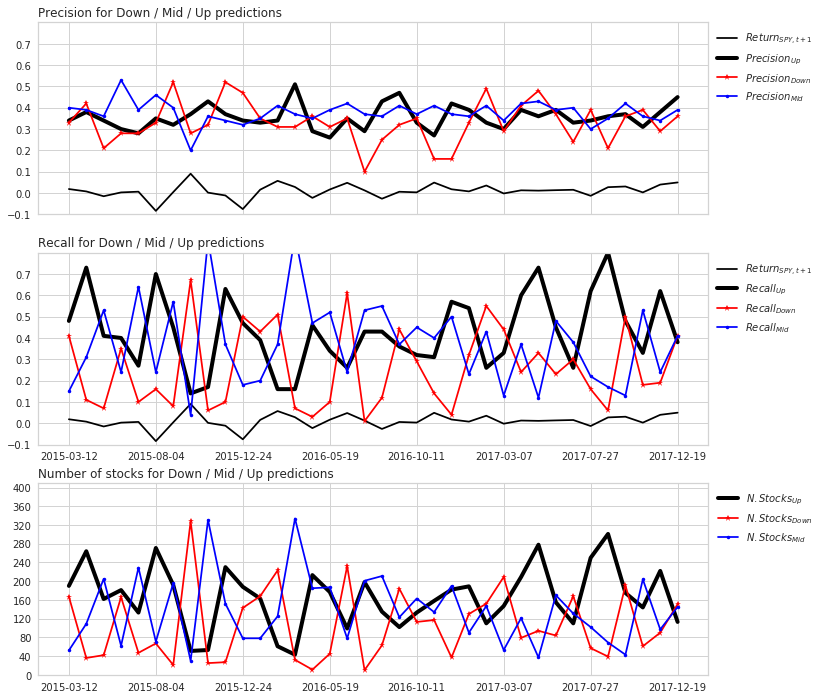

In [35]:
# Precision, recall and number of stocks
plt.figure(figsize=(12, 12))
plt.rc('axes',edgecolor='lightgray')

ax1 = plt.subplot(311)
plt.title('Precision for Down / Mid / Up predictions', loc='left')
ax1.grid(color='lightgray', linestyle='-', linewidth=1, which='major', axis='both')

line1, = ax1.plot(r3_wide['Date'], r3_wide['SPY_YR'], 'k-', label='$Return_{SPY, t+1}$')
line2, = ax1.plot(r3_wide['Date'], r3_wide['precision_2'], 'k-', linewidth=4, label='$Precision_{Up}$')
line3, = ax1.plot(r3_wide['Date'], r3_wide['precision_0'], 'r*-', label='$Precision_{Down}$')
line4, = ax1.plot(r3_wide['Date'], r3_wide['precision_1'], 'b.-', label='$Precision_{Mid}$')

ax1.set_ylim([-0.10, 0.80])
ax1.yaxis.set_ticks(np.arange(-0.10, 0.80, 0.10))
ax1.set_xticks(ax1.get_xticks()[::5])
ax1.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
ax1.legend(loc='upper right')
ax1.legend(bbox_to_anchor=(1, 1))

ax2 = plt.subplot(312)
plt.title('Recall for Down / Mid / Up predictions', loc='left')
ax2.grid(color='lightgray', linestyle='-', linewidth=1, which='major', axis='both')
ax2.set_ylim([-0.10, 0.80])
ax2.yaxis.set_ticks(np.arange(-0.10, 0.80, 0.10))
ax2.tick_params(labelsize = 'small')
ax2.set_xticks(ax1.get_xticks()[::1])
#ax2.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
labels = list(r3_wide['Date'])[::5]
ax2.set_xticklabels(labels)
n = 1  
[l.set_visible(False) for (i,l) in enumerate(ax2.xaxis.get_ticklabels()) if i % n != 0]
line5, = ax2.plot(r3_wide['Date'], r3_wide['SPY_YR'], 'k-', label='$Return_{SPY, t+1}$')
line6, = ax2.plot(r3_wide['Date'], r3_wide['recall_2'], 'k-',linewidth=4, label='$Recall_{Up}$')
line7, = ax2.plot(r3_wide['Date'], r3_wide['recall_0'], 'r*-', label='$Recall_{Down}$')
line8, = ax2.plot(r3_wide['Date'], r3_wide['recall_1'], 'b.-', label='$Recall_{Mid}$')
ax2.legend(loc='upper right')
ax2.legend(bbox_to_anchor=(1, 1))

ax3 = plt.subplot(313)
plt.title('Number of stocks for Down / Mid / Up predictions', loc='left')
ax3.grid(color='lightgray', linestyle='-', linewidth=1, which='major', axis='both')
ax3.set_ylim([0, 410])
ax3.yaxis.set_ticks(np.arange(0, 410, 40))
ax3.tick_params(labelsize = 'small')
ax3.set_xticks(ax1.get_xticks()[::1])
labels = list(r3_wide['Date'])[::5]
ax3.set_xticklabels(labels)
n = 1  
[l.set_visible(False) for (i,l) in enumerate(ax2.xaxis.get_ticklabels()) if i % n != 0]
line9, = ax3.plot(r3_wide['Date'], r3_wide['Y_pred_size2'], 'k-',linewidth=4, label='$N. Stocks_{Up}$')
line10, = ax3.plot(r3_wide['Date'], r3_wide['Y_pred_size0'], 'r*-', label='$N. Stocks_{Down}$')
line11, = ax3.plot(r3_wide['Date'], r3_wide['Y_pred_size1'], 'b.-', label='$N. Stocks_{Mid}$')
ax3.legend(loc='upper right')
ax3.legend(bbox_to_anchor=(1.17, 1.0))

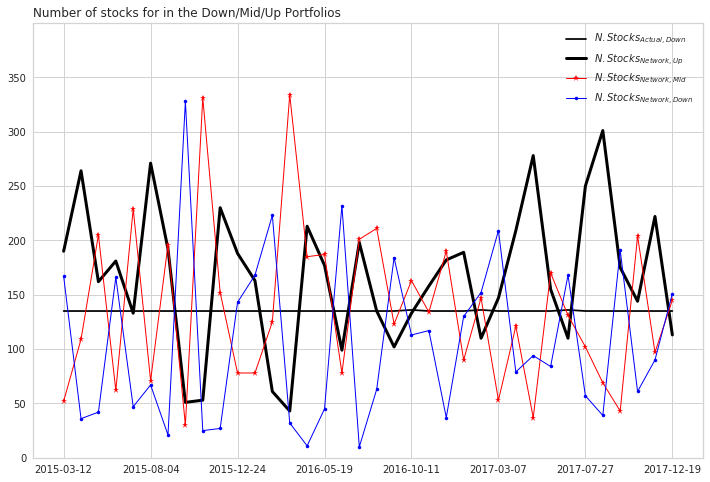

In [36]:
plt.figure(figsize=(12, 8))
plt.rc('axes',edgecolor='lightgray')

ax3 = plt.subplot(111)
plt.title('Number of stocks for in the Down/Mid/Up Portfolios', loc='left')
ax3.grid(color='lightgray', linestyle='-', linewidth=1, which='major', axis='both')
ax3.set_ylim([0,400])
ax3.yaxis.set_ticks(np.arange(0, 400, 50))
ax3.tick_params(labelsize = 'small')
ax3.set_xticks(ax1.get_xticks()[::1])
labels = list(r3_wide['Date'])[::5]
ax3.set_xticklabels(labels )# , fontdict=None, minor=False, **kwargs)¶
n = 1  
[l.set_visible(False) for (i,l) in enumerate(ax3.xaxis.get_ticklabels()) if i % n != 0]

line1, = ax3.plot(r3_wide['Date'], r3_wide['Y_size2'], 'k-', label='$N. Stocks_{Actual, Down}$')
line2, = ax3.plot(r3_wide['Date'], r3_wide['Y_pred_size2'], 'k-', linewidth=3, label='$N. Stocks_{Network, Up}$')
line3, = ax3.plot(r3_wide['Date'], r3_wide['Y_pred_size1'], 'r*-', linewidth=1, label='$N. Stocks_{Network, Mid}$')
line4, = ax3.plot(r3_wide['Date'], r3_wide['Y_pred_size0'], 'b.-', linewidth=1, label='$N. Stocks_{Network, Down}$')
ax3.legend(loc='upper right')

In [37]:
print list(r3_wide)

['Date', 'Y_mean0', 'Y_mean1', 'Y_mean2', 'Y_min0', 'Y_min1', 'Y_min2', 'Y_size0', 'Y_size1', 'Y_size2', 'Y_std0', 'Y_std1', 'Y_std2', 'Y_max0', 'Y_max1', 'Y_max2', 'Y_median0', 'Y_median1', 'Y_median2', 'Y_pred_median0', 'Y_pred_median1', 'Y_pred_median2', 'Y_pred_min0', 'Y_pred_min1', 'Y_pred_min2', 'Y_pred_size0', 'Y_pred_size1', 'Y_pred_size2', 'Y_pred_mean0', 'Y_pred_mean1', 'Y_pred_mean2', 'Y_pred_max0', 'Y_pred_max1', 'Y_pred_max2', 'Y_pred_std0', 'Y_pred_std1', 'Y_pred_std2', 'Y_rev_max0', 'Y_rev_max1', 'Y_rev_max2', 'Y_rev_std0', 'Y_rev_std1', 'Y_rev_std2', 'Y_rev_min0', 'Y_rev_min1', 'Y_rev_min2', 'Y_rev_mean0', 'Y_rev_mean1', 'Y_rev_mean2', 'Y_rev_median0', 'Y_rev_median1', 'Y_rev_median2', 'Y_rev_size0', 'Y_rev_size1', 'Y_rev_size2', 'Y_rand3_median0', 'Y_rand3_median1', 'Y_rand3_median2', 'Y_rand3_min0', 'Y_rand3_min1', 'Y_rand3_min2', 'Y_rand3_max0', 'Y_rand3_max1', 'Y_rand3_max2', 'Y_rand3_mean0', 'Y_rand3_mean1', 'Y_rand3_mean2', 'Y_rand3_size0', 'Y_rand3_size1', 'Y_ran

In [38]:
temp = r3_wide[[]]
r3_wide.describe()

,Y_mean0,Y_mean1,Y_mean2,Y_min0,Y_min1,Y_min2,Y_size0,Y_size1,Y_size2,Y_std0,...,act0_pred2,act1_pred0,act1_pred1,act2_pred2,act2_pred0,act2_pred1,act2_pred2.1,SPY_R,SPY_YR,SPY_RT
count,36.0000,36.0000,36.0000,36.0000,36.0000,36.0000,36.0000,36.0000,36.0000,36.0000,...,36.0000,36.0000,36.0000,36.0000,36.0000,36.0000,36.0000,36.0000,36.0000,36.0000
mean,-0.0516,0.0109,0.0722,-0.2306,-0.0109,0.0325,135.1667,138.7500,135.0833,0.0389,...,56.1389,34.9167,51.8056,52.0278,35.8889,41.1944,58.0000,0.0095,0.0106,0.0441
std,0.0338,0.0319,0.0393,0.0713,0.0310,0.0335,0.4472,0.6036,0.2803,0.0106,...,22.2879,27.1108,27.3316,23.2311,26.6670,24.6493,23.3116,0.0317,0.0324,0.8240
min,-0.1691,-0.0782,-0.0260,-0.4452,-0.1006,-0.0592,135.0000,136.0000,135.0000,0.0183,...,9.0000,1.0000,6.0000,10.0000,4.0000,2.0000,19.0000,-0.0838,-0.0838,-1.7897
25%,-0.0629,-0.0005,0.0555,-0.2716,-0.0198,0.0168,135.0000,139.0000,135.0000,0.0295,...,46.5000,12.7500,31.7500,37.0000,16.5000,21.7500,43.5000,0.0016,0.0026,-0.3488
50%,-0.0483,0.0110,0.0685,-0.2128,-0.0127,0.0314,135.0000,139.0000,135.0000,0.0381,...,56.5000,28.0000,51.0000,51.5000,27.5000,34.5000,56.5000,0.0099,0.0118,-0.0176
75%,-0.0326,0.0291,0.0883,-0.1825,0.0070,0.0504,135.0000,139.0000,135.0000,0.0468,...,76.0000,58.0000,70.5000,67.2500,53.7500,59.0000,74.0000,0.0209,0.0276,0.4561
max,0.0107,0.0794,0.1874,-0.1188,0.0517,0.1052,137.0000,139.0000,136.0000,0.0634,...,97.0000,123.0000,122.0000,101.0000,114.0000,100.0000,108.0000,0.0906,0.0906,2.2154


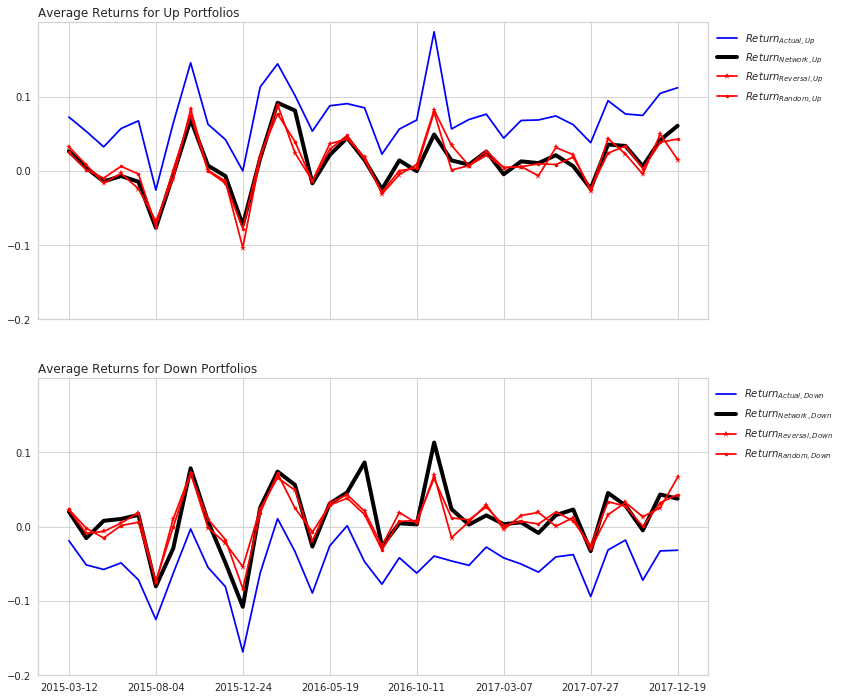

In [39]:
# Returns
plt.figure(figsize=(12, 12))
plt.rc('axes',edgecolor='lightgray')

ax1 = plt.subplot(211)
plt.title('Average Returns for Up Portfolios', loc='left')
line1, = ax1.plot(r3_wide['Date'], r3_wide['Y_mean2'], 'b-', label='$Return_{Actual, Up}$')
line2, = ax1.plot(r3_wide['Date'], r3_wide['Y_pred_mean2'], 'k-', linewidth=4, label='$Return_{Network, Up}$')
line3, = ax1.plot(r3_wide['Date'], r3_wide['Y_rev_mean2'], 'r*-', label='$Return_{Reversal, Up}$')
line4, = ax1.plot(r3_wide['Date'], r3_wide['Y_rand3_mean2'], 'r.-', label='$Return_{Random, Up}$')

ax1.legend(loc='upper right')
ax1.legend(bbox_to_anchor=(1, 1))
ax1.grid(color='lightgray', linestyle='-', linewidth=1, which='major', axis='both')
ax1.set_ylim([-0.20,0.20])
ax1.yaxis.set_ticks(np.arange(-0.20, 0.20, 0.10))
ax1.set_xticks(ax1.get_xticks()[::5])
ax1.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')

plt.subplot(212)
ax2 = plt.subplot(212)
plt.title('Average Returns for Down Portfolios', loc='left')
ax2.grid(color='lightgray', linestyle='-', linewidth=1, which='major', axis='both')
ax2.set_ylim([-0.20,0.20])
ax2.yaxis.set_ticks(np.arange(-0.20, 0.20, 0.10))
ax2.tick_params(labelsize = 'small')
ax2.set_xticks(ax1.get_xticks()[::1])
labels = list(r3_wide['Date'])[::5]
ax2.set_xticklabels(labels )# , fontdict=None, minor=False, **kwargs)¶
n = 1  
[l.set_visible(False) for (i,l) in enumerate(ax2.xaxis.get_ticklabels()) if i % n != 0]

line5, = ax2.plot(r3_wide['Date'], r3_wide['Y_mean0'], 'b-', label='$Return_{Actual, Down}$')
line6, = ax2.plot(r3_wide['Date'], r3_wide['Y_pred_mean0'], 'k-',linewidth=4, label='$Return_{Network, Down}$')
line7, = ax2.plot(r3_wide['Date'], r3_wide['Y_rev_mean0'], 'r*-', label='$Return_{Reversal, Down}$')
line8, = ax2.plot(r3_wide['Date'], r3_wide['Y_rand3_mean0'], 'r.-', label='$Return_{Random, Down}$')
ax2.legend(loc='upper right')
ax2.legend(bbox_to_anchor=(1.2, 1))

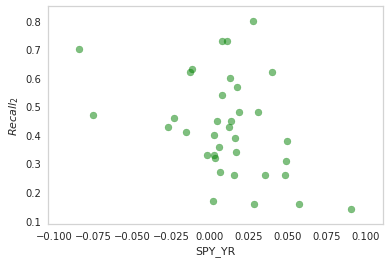

In [40]:
#import matplotlib.pyplot as plt
#import numpy as np
#import matplotlib

# Fixing random state for reproducibility
#np.random.seed(19680801)


#x = np.arange(0.0, 50.0, 2.0)
#y = x ** 1.3 + np.random.rand(*x.shape) * 30.0
#s = np.random.rand(*r3_wide['SPY_YR'].shape) * 800 + 500

plt.scatter(r3_wide['SPY_YR'], r3_wide['recall_2'], c="g", alpha=0.5,
            label="SPY_YR")
plt.xlabel("SPY_YR")
plt.ylabel("$Recall_2$")
#plt.legend(loc=2)
plt.show()

In [41]:
display(res)

,Ticker,Date,V,P,AV,R,DRSD,YR,Y,pr_0,pr_1,pr_2,Y_pred,Y_mom,Y_rev,Y_rand3
0,A,2015-03-12,111.7900,39.9600,98.4765,0.0450,0.0124,0.0623,2,0.3428,0.1398,0.5174,2,2,0,1
1,AAP,2015-03-12,116.2400,148.6400,176.5655,-0.0805,0.0187,0.0063,1,0.4674,0.3370,0.1956,0,0,2,1
2,AAPL,2015-03-12,"6,018.7400",118.6900,"7,759.9455",-0.0034,0.0138,0.0213,1,0.1803,0.4011,0.4186,2,1,1,1
3,ABC,2015-03-12,152.6100,100.9200,165.4435,0.0703,0.0066,0.0946,2,0.2167,0.5361,0.2472,1,2,0,1
4,ABT,2015-03-12,246.1600,44.3400,260.8770,0.0515,0.0101,-0.0020,0,0.4927,0.2095,0.2978,0,2,0,0
5,ACN,2015-03-12,190.9700,82.9700,207.2320,0.0028,0.0109,0.0851,2,0.3467,0.1346,0.5187,2,1,1,0
6,ADBE,2015-03-12,130.2800,77.4000,155.7335,0.0601,0.0130,-0.0112,0,0.2390,0.2930,0.4680,2,2,0,2
7,ADI,2015-03-12,58.1300,53.9500,103.2235,0.0409,0.0126,0.1170,2,0.2110,0.3058,0.4832,2,2,0,1
8,ADM,2015-03-12,165.4500,43.0400,153.9715,-0.0002,0.0122,0.0283,1,0.5452,0.0928,0.3620,0,1,1,1
9,ADP,2015-03-12,102.8700,81.4700,176.8765,0.0007,0.0119,-0.0005,0,0.4157,0.1963,0.3879,0,1,1,2


In [42]:
tmp = dflong[['Ticker','Date','RC','AVC','SDC']]
# Market variables
res = res.merge(tmp, how='left', left_on=['Ticker','Date'], right_on = ['Ticker','Date'], sort=False)
display(res)

,Ticker,Date,V,P,AV,R,DRSD,YR,Y,pr_0,pr_1,pr_2,Y_pred,Y_mom,Y_rev,Y_rand3,RC,AVC,SDC
0,A,2015-03-12,111.7900,39.9600,98.4765,0.0450,0.0124,0.0623,2,0.3428,0.1398,0.5174,2,2,0,1,0.7671,-0.3154,-0.1670
1,AAP,2015-03-12,116.2400,148.6400,176.5655,-0.0805,0.0187,0.0063,1,0.4674,0.3370,0.1956,0,0,2,1,-1.5990,-0.1372,1.3491
2,AAPL,2015-03-12,"6,018.7400",118.6900,"7,759.9455",-0.0034,0.0138,0.0213,1,0.1803,0.4011,0.4186,2,1,1,1,-0.1461,17.1698,0.1663
3,ABC,2015-03-12,152.6100,100.9200,165.4435,0.0703,0.0066,0.0946,2,0.2167,0.5361,0.2472,1,2,0,1,1.2449,-0.1626,-1.5496
4,ABT,2015-03-12,246.1600,44.3400,260.8770,0.0515,0.0101,-0.0020,0,0.4927,0.2095,0.2978,0,2,0,0,0.8893,0.0552,-0.7100
5,ACN,2015-03-12,190.9700,82.9700,207.2320,0.0028,0.0109,0.0851,2,0.3467,0.1346,0.5187,2,1,1,0,-0.0287,-0.0672,-0.5050
6,ADBE,2015-03-12,130.2800,77.4000,155.7335,0.0601,0.0130,-0.0112,0,0.2390,0.2930,0.4680,2,2,0,2,1.0528,-0.1848,-0.0211
7,ADI,2015-03-12,58.1300,53.9500,103.2235,0.0409,0.0126,0.1170,2,0.2110,0.3058,0.4832,2,2,0,1,0.6902,-0.3046,-0.1101
8,ADM,2015-03-12,165.4500,43.0400,153.9715,-0.0002,0.0122,0.0283,1,0.5452,0.0928,0.3620,0,1,1,1,-0.0855,-0.1888,-0.1994
9,ADP,2015-03-12,102.8700,81.4700,176.8765,0.0007,0.0119,-0.0005,0,0.4157,0.1963,0.3879,0,1,1,2,-0.0673,-0.1365,-0.2766


In [43]:
# Network prediction,'
res.groupby(['Date','Y_pred'])['pr_2'].agg({'mean': np.mean, 'median': np.median, 'min': np.min, 'max': np.max,'std': np.std, 'size': np.size})

std                  min  \
Date       Y_pred                                             
2015-03-12 0                    0.0905               0.0577   
           1                    0.0784               0.0792   
           2                    0.1301               0.3613   
2015-04-10 0                    0.1001               0.0976   
           1                    0.0720               0.1452   
           2                    0.1398               0.3434   
2015-05-08 0                    0.0771               0.1502   
           1                    0.0896               0.0463   
           2                    0.1529               0.3485   
2015-06-08 0                    0.0863               0.0599   
           1                    0.0832               0.0610   
           2                    0.1483               0.3567   
2015-07-07 0                    0.0856               0.0540   
           1                    0.0999               0.0253   
           2                    0.1297               0.3567   
2015-08-04 0                    0.0908               0.0668   
           1                    0.0763               0.0613   
           2                    0.1468               0.3547   
2015-09-01 0                    0.0965               0.1053   
           1                    0.0915               0.0424   
           2                    0.1449               0.3558   
2015-09-30 0                    0.0944               0.0182   
           1                    0.0763               0.1104   
           2                    0.1598               0.3647   
2015-10-28 0                    0.0795               0.0379   
           1                    0.1026               0.0132   
           2                    0.1629               0.3593   
2015-11-25 0                    0.0792               0.1116   
           1                    0.1077               0.0419   
           2                    0.1257               0.3743   
...                                ...                  ...   
2017-04-04 0                    0.1092               0.0306   
           1                    0.1047               0.0296   
           2                    0.1508               0.3441   
2017-05-02 0                    0.1079               0.0308   
           1                    0.1083               0.0737   
           2                    0.1387               0.3441   
2017-05-31 0                    0.1093               0.0292   
           1                    0.1008               0.0159   
           2                    0.1607               0.3583   
2017-06-28 0                    0.1001               0.0090   
           1                    0.0962               0.0209   
           2                    0.1608               0.3655   
2017-07-27 0                    0.1070               0.0233   
           1                    0.1011               0.0556   
           2                    0.1522               0.3641   
2017-08-24 0                    0.1046               0.0174   
           1                    0.0912               0.0955   
           2                    0.1556               0.3747   
2017-09-22 0                    0.1079               0.0127   
           1                    0.0911               0.0414   
           2                    0.1397               0.3637   
2017-10-20 0                    0.1218               0.0077   
           1                    0.1122               0.0108   
           2                    0.1393               0.3706   
2017-11-20 0                    0.1143               0.0215   
           1                    0.1111               0.0290   
           2                    0.1346               0.3572   
2017-12-19 0                    0.1101               0.0189   
           1                    0.1239               0.0081   
           2                    0.1417               0.3665   

                                   max               median  \
Da

In [60]:
res['Corr'] = (res['Y']==res['Y_pred'])*1
ticker_avg = res.groupby('Ticker', as_index = False).agg({'Corr': 'sum', 'AVC': 'mean', 'RC': 'mean', 'SDC': 'mean'})
ticker_avg['Corr'] = ticker_avg['Corr'] /  r3_wide.shape[0]
ticker_avg.sort_values(by='Corr', ascending=False, inplace = True)
display(ticker_avg)

,Ticker,SDC,RC,Corr,AVC
363,TMK,-0.7687,0.1169,0.5833,-0.5914
367,TSN,0.1351,0.2813,0.5833,-0.1275
268,MYL,1.3547,-0.0896,0.5833,0.1566
244,MCD,-0.7085,0.1703,0.5833,1.0217
281,NVDA,1.4558,0.9320,0.5556,2.5434
157,FRT,-0.4299,-0.1403,0.5556,-0.5197
190,HSY,-0.4785,-0.0649,0.5556,-0.3463
121,ECL,-0.6949,-0.0412,0.5278,-0.3295
291,PCAR,-0.0578,-0.0748,0.5278,-0.3397
131,EQT,0.7186,-0.2770,0.5278,-0.2972


In [46]:
#!pip install -U statsmodels
import statsmodels.api as sm

results = sm.OLS(ticker_avg[['Corr']], ticker_avg[['SDC','RC','AVC']], missing='drop').fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Corr   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.2782
Date:                Wed, 04 Apr 2018   Prob (F-statistic):              0.841
Time:                        13:27:46   Log-Likelihood:                -165.78
No. Observations:                 409   AIC:                             337.6
Df Residuals:                     406   BIC:                             349.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SDC            0.0044      0.028      0.157      0.8

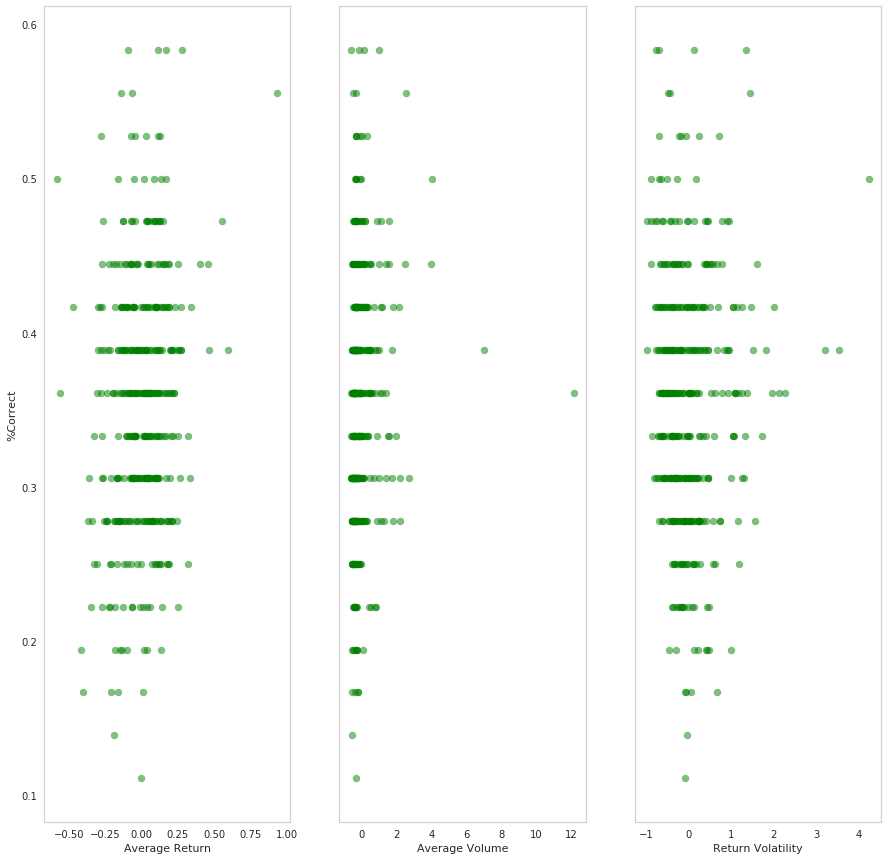

In [47]:
plt.figure(figsize=(15, 15))
plt.rc('axes',edgecolor='lightgray')

sc01 = plt.subplot(131)
plt.scatter(ticker_avg['RC'], ticker_avg['Corr'], c="g", alpha=0.5, #marker=r'$\clubsuit$',
            label="AvgRet")

plt.xlabel("Average Return")
plt.ylabel("%Correct")

sc2 = plt.subplot(132)
plt.scatter(ticker_avg['AVC'], ticker_avg['Corr'], c="g", alpha=0.5, #marker=r'$\clubsuit$',
            label="AvgRet")
sc2.axes.yaxis.set_ticklabels([])
plt.xlabel("Average Volume")
#plt.ylabel("%Correct")

sc3 = plt.subplot(133)
plt.scatter(ticker_avg['SDC'], ticker_avg['Corr'], c="g", alpha=0.5, #marker=r'$\clubsuit$',
            label="AvgRet")
plt.xlabel("Return Volatility")
sc3.axes.yaxis.set_ticklabels([])
plt.show()

## Functions


In [13]:
# Inputs are 0/1/2, not the one-hot coded versions
def show_results (y_true, y_pred):

    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    error = 100.0 - (100 * float(correct) / float(total))
    print ("Error rate: %.1f%%" % (error))

    print classification_report(y_true, y_pred)
    print confusion_matrix(y_true, y_pred)
    
    confusions = np.zeros([3, 3], np.float32)
    bundled = zip(y_true, y_pred)
    for actual, predicted in bundled:
        confusions[actual, predicted] += 1

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.grid(False)
    plt.xticks(np.arange(3))
    plt.yticks(np.arange(3))
    plt.imshow(confusions, cmap=plt.cm.RdGy, interpolation='nearest')

    for i, cas in enumerate(confusions):
        for j, count in enumerate(cas):
            if count >= 0:
                xoff = .07 * len(str(count))
                plt.text(j-xoff, i+.2, int(count), fontsize=9, color='blue')
    plt.show() 

In [48]:
print list(res)

['Ticker', 'Date', 'V', 'P', 'AV', 'R', 'DRSD', 'YR', 'Y', 'pr_0', 'pr_1', 'pr_2', 'Y_pred', 'Y_mom', 'Y_rev', 'Y_rand3', 'RC', 'AVC', 'SDC', 'Corr']


In [51]:
tmp1 = dflong.merge(res[['Ticker', 'Date', 'pr_0', 'pr_1', 'pr_2', 'Y_pred', 'Y_mom', 'Y_rev', 'Y_rand3', 'Corr']], how='right', left_on=['Ticker','Date'], right_on = ['Ticker','Date'], sort=False)

In [53]:
display(tmp1)
tmp1.to_csv('SP500_Predictions.CSV', index = False, float_format='%.4f')

,Ticker,Date,R,YR,AV,DRSD,RC,AVC,SDC,RT,...,SPY_YR,SPY_RT,pr_0,pr_1,pr_2,Y_pred,Y_mom,Y_rev,Y_rand3,Corr
0,A,2015-03-12,0.0450,0.0623,98.4765,0.0124,0.7671,-0.3154,-0.1670,0.7430,...,0.0187,-0.2723,0.3428,0.1398,0.5174,2,2,0,1,1
1,A,2015-04-10,0.0623,-0.0243,95.7235,0.0121,0.8678,-0.4027,-0.1446,0.9137,...,0.0075,0.1754,0.1389,0.3813,0.4798,2,2,0,1,0
2,A,2015-05-08,-0.0243,-0.0599,79.7220,0.0080,-0.4568,-0.3971,-0.9727,-0.5481,...,-0.0151,-0.0824,0.2005,0.1964,0.6031,2,0,2,1,0
3,A,2015-06-08,-0.0599,-0.0015,108.8825,0.0095,-1.0425,-0.3206,-0.2713,-1.0179,...,0.0029,-0.5936,0.4209,0.2183,0.3609,0,0,2,1,0
4,A,2015-07-07,-0.0015,0.0208,110.6905,0.0117,-0.0871,-0.3649,-0.0566,-0.0054,...,0.0063,-0.0853,0.2216,0.5892,0.1891,1,1,1,1,1
5,A,2015-08-04,0.0208,-0.1446,91.4835,0.0132,0.2735,-0.3584,-0.0972,0.3729,...,-0.0838,-0.0064,0.2268,0.1348,0.6384,2,1,1,1,0
6,A,2015-09-01,-0.1446,-0.0091,104.3110,0.0207,-1.4228,-0.3551,-0.1372,-1.8509,...,0.0043,-1.7897,0.0603,0.2173,0.7224,2,0,2,1,0
7,A,2015-09-30,-0.0091,0.0930,77.8145,0.0164,-0.1924,-0.4307,-0.1058,-0.0758,...,0.0906,-0.0124,0.7011,0.1210,0.1779,0,1,1,1,0
8,A,2015-10-28,0.0930,0.1017,88.6660,0.0140,0.2698,-0.4296,-0.4237,1.6047,...,0.0018,2.2154,0.1038,0.8146,0.0815,1,1,1,1,0
9,A,2015-11-25,0.1017,0.0193,141.6700,0.0145,1.6386,-0.2576,-0.1926,1.4136,...,-0.0115,-0.1032,0.2105,0.5901,0.1994,1,2,0,1,0


In [62]:
tmp1.groupby('Y_pred').agg({'AVC': 'mean', 'RC': 'mean','SDC': 'mean',\
                            'AVT': 'mean', 'RT': 'mean', 'SDT': 'mean','SPY_RT': 'mean'})

,SDT,RT,AVT,RC,SDC,SPY_RT,AVC
Y_pred,,,,,,,
0,0.0446,-0.3063,0.1781,-0.2857,0.1924,0.0097,0.0126
1,-0.0251,0.1023,0.1905,-0.0010,-0.2825,0.2210,-0.0184
2,-0.1256,0.0683,-0.0865,0.1827,0.1105,-0.0798,0.0072


In [63]:
tmp1.groupby('Corr').agg({'AVC': 'mean', 'RC': 'mean','SDC': 'mean',\
                          'AVT': 'mean', 'RT': 'mean', 'SDT': 'mean','SPY_RT': 'mean'})

,SDT,RT,AVT,RC,SDC,SPY_RT,AVC
Corr,,,,,,,
0,-0.0397,-0.0002,0.0715,0.0176,0.0058,0.0430,-0.0111
1,-0.0628,-0.0481,0.0807,-0.0322,-0.0106,0.0461,0.0202
